In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from datetime import datetime
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1z_mc-ZwEES0qwuWcYteOpY-ZHxDz5dB2'})
downloaded.GetContentFile('kaggle_visible_evaluation_triplets.txt') 

In [ ]:
df = pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])
df.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [ ]:
dupes=df.duplicated()
sum(dupes)#checking the duplicated values in the data set

0

In [ ]:
df.isnull().sum()#checking the null values in each column

user_id    0
song_id    0
freq       0
dtype: int64

In [ ]:
downloaded = drive.CreateFile({'id':'1HuOhf4w5HNkZFUDjBZPYOLyA1bHbmoc3'})
downloaded.GetContentFile('unique_tracks.txt') 

In [ ]:
detail_df = pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist_name','release'])
detail_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
detail_df.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


In [ ]:
duplicated = detail_df['song_id'].duplicated()
sum(duplicated)

944

In [ ]:
#removing the duplicated values from song_id column
detail_df.drop_duplicates(subset = "song_id",keep = False,inplace = True)

In [ ]:
duplicated = detail_df['song_id'].duplicated()
sum(duplicated)

0

In [ ]:
detail_df.shape#checking the shape of data frame after removing the duplicates

(998160, 4)

In [ ]:
#checking null values in the data frame
detail_df.isnull().sum()

track_id        0
song_id         0
artist_name     0
release        15
dtype: int64

In [ ]:
pd.DataFrame( detail_df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
track_id,0
song_id,0
artist_name,0
release,15


In [ ]:
detail_df['release']

0                                Silent Night
1                                 Tanssi vaan
2                           No One Could Ever
3                               Si Vos Querés
4                            Tangle Of Aspens
                         ...                 
999995                        O Samba Da Vida
999996                           Jago Chhadeo
999997                                Novemba
999998                                Faraday
999999    Fernweh feat. Sektion Kuchikäschtli
Name: release, Length: 998160, dtype: object

In [ ]:
detail_df.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
detail_df.isnull().sum()


track_id       0
song_id        0
artist_name    0
release        0
dtype: int64

In [ ]:
detail_df.shape

(998145, 4)

Merge 2 Dataframe

In [ ]:
song_df = pd.merge(df,detail_df,how = "left")

In [ ]:
song_df.head(10)

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,TRWBSCZ128F932F2F9,Beastie Boys,Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,TRCQXMT128E0786397,Moby,Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,TRZLFVB128F429FED0,Guano Apes,Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,TRIKCQI128F92DDC16,Guano Apes,Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,TRTBQQG128F9339E23,UDG,Kurtizana


In [ ]:
song_df.shape

(1450933, 6)

In [ ]:
dupes=song_df.duplicated()#checking duplicated values after merging the two data frames 
sum(dupes)

0

In [ ]:
words = ' '.join(song_df['release'])

print(words[:2000])

TypeError: ignored

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

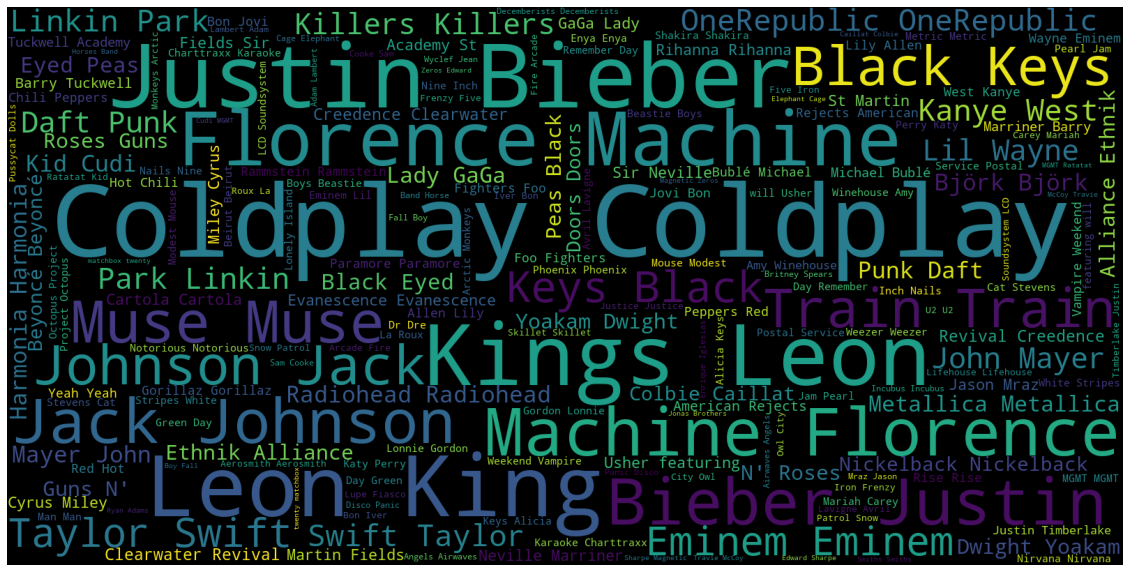

In [ ]:
plt.figure(1,figsize=(20,20))#making a word cloud for a release column
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
song_df.shape

(1450933, 6)

In [ ]:
words = ' '.join(song_df['artist_name'])

print(words[:2000])

TypeError: ignored

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

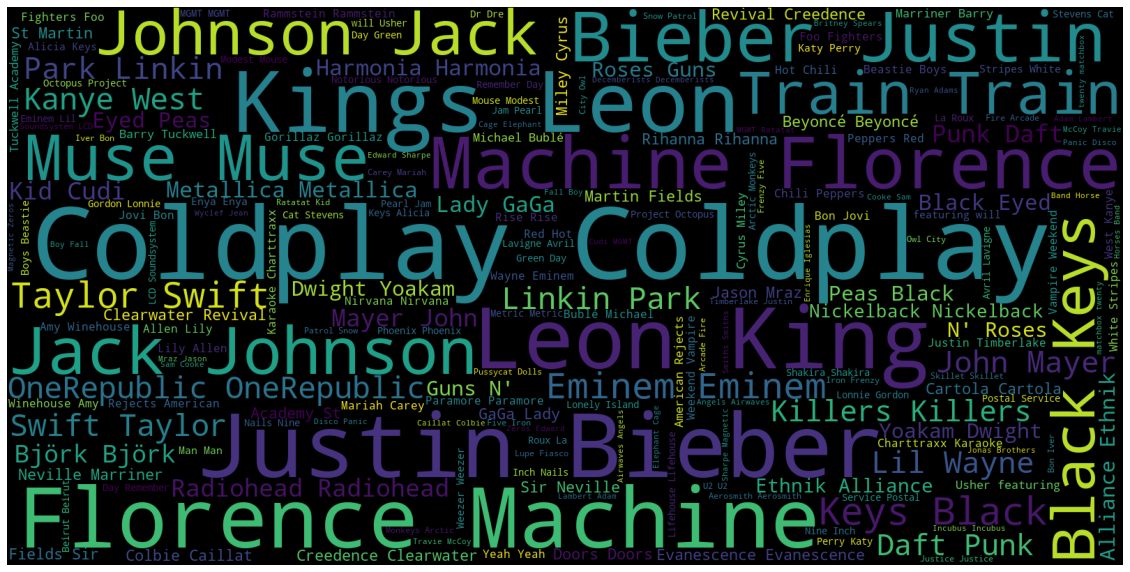

In [ ]:
plt.figure(1,figsize=(20,20))#making a word cloud for a artist_name column
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
song_df

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,Dwight Yoakam,You're The One
...,...,...,...,...,...
1456559,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,Our Broken Garden,The Blinding
1456560,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,Emilio,Como A Nadie
1456561,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,Morbid Angel,Victorious March Of Reign The Conqueror
1456562,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,Gus Gus,Call of the Wild


In [ ]:
print('Total data Points',song_df.shape[0])
print('Total Number of Users: ',song_df['user_id'].unique().shape[0])
print('Total Number of songs: ',song_df['song_id'].unique().shape[0])

Total data Points 1456564
Total Number of Users:  110000
Total Number of songs:  163205


In [ ]:
print('Total Number of Unique Songs Releases',song_df['release'].unique().shape[0])
print('Total Number of Unique artists are ',song_df['artist_name'].unique().shape[0])

Total Number of Unique Songs Releases 137670
Total Number of Unique artists are  28366


In [ ]:
song_df.describe()

,freq
count,1.456564e+06
mean,3.185949e+00
std,7.044769e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [ ]:
song_df.describe(include="all")

,user_id,song_id,freq,artist_name,release
count,1456564,1456564,1.456564e+06,1456564,1456564
unique,110000,163205,NaN,28366,137670
top,03ad93fdb01506ce205f4708decf8e4b1ae90fff,SOFRQTD12A81C233C0,NaN,Coldplay,Sehr kosmisch
freq,53,5043,NaN,12279,5043
mean,NaN,NaN,3.185949e+00,NaN,NaN
std,NaN,NaN,7.044769e+00,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN
25%,NaN,NaN,1.000000e+00,NaN,NaN
50%,NaN,NaN,1.000000e+00,NaN,NaN
75%,NaN,NaN,3.000000e+00,NaN,NaN


In [ ]:
song_df['freq'].max()#checking the maximum frequency 

923

In [ ]:
song_df['artist_name'].value_counts()

Coldplay                                  12279
Kings Of Leon                              8514
Florence + The Machine                     8213
Justin Bieber                              7669
Muse                                       6856
                                          ...  
NENO BELAN FEAT. }AN JAKOPAC & FIUMENS        1
Lloyd Banks / Tony Yayo                       1
Woody Allen;Eddy Davis;Greg Cohen             1
Electrosoul System                            1
Chingo Bling w/ICE                            1
Name: artist_name, Length: 28366, dtype: int64

In [ ]:
song_df['artist_name'].value_counts().count()#checking the no.of artist names

28366

In [ ]:
a=song_df['artist_name'].value_counts().count()#checking the no.of unique artist names
b=np.unique(a)
b

array([28366])

In [ ]:
song_df['song_id'].value_counts().count()#checking the no.of song id

163205

In [ ]:
a=song_df['song_id'].value_counts().count()#checking the no.of unique song id
b=np.unique(a)
b

array([163205])

In [ ]:
song_df['user_id'].value_counts().unique()#checking no.of unique userid

array([53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37,
       36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5])

In [ ]:
a=song_df['user_id'].value_counts().unique()
len(a)

49

In [ ]:
song_df['release'].value_counts()

Sehr kosmisch                        5043
Undo                                 4483
You're The One                       4270
Dog Days Are Over (Radio Edit)       3780
Revelry                              3672
                                     ... 
California Blues                        1
Anything But This (Album Version)       1
Anchor Man                              1
If You Never Been There                 1
Scatology Domine (Intro)                1
Name: release, Length: 137670, dtype: int64

In [ ]:
song_df['release'].value_counts().count()

In [ ]:
a=song_df['release'].value_counts().unique()#checking the no.of unique release
len(a)

In [ ]:
song_df.head()

In [ ]:
sns.distplot(song_df['freq'])
plt.show()

In [ ]:
a=song_df['freq'].max()

In [ ]:
song_df.groupby(['user_id']).count()#groupby

In [ ]:
song=song_df.groupby(['user_id']).count()#groupby

In [ ]:
song

In [ ]:
song.sort_values(by=).head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.heatmap(song_df.corr(), annot=True, square=True)
plt.show()